SKILL PAY ANALYSIS

In [40]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda x: ast.literal_eval(x) 
                           if pd.notna(x) else x))


In [41]:
df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & 
              (df['job_country'] == 'United Kingdom')].copy()

df_DS_UK = df_DS_UK.dropna(subset= ["salary_year_avg"])

In [42]:
df_DS_UK = df_DS_UK.explode('job_skills')

df_DS_UK[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel
...,...,...
783436,72900.0,keras
783436,72900.0,tensorflow
783436,72900.0,tableau
783436,72900.0,flow


In [43]:
df_DS_UK_group = (df_DS_UK.groupby('job_skills')
                  ['salary_year_avg'].agg(['count', 'median']))

df_DS_top_pay = (df_DS_UK_group.sort_values
                 (by='median', ascending=False).head(10))

df_DS_top_skills = (df_DS_UK_group
                    .sort_values(by='count', ascending=False).head(10)
                    .sort_values(by='median', ascending=False))



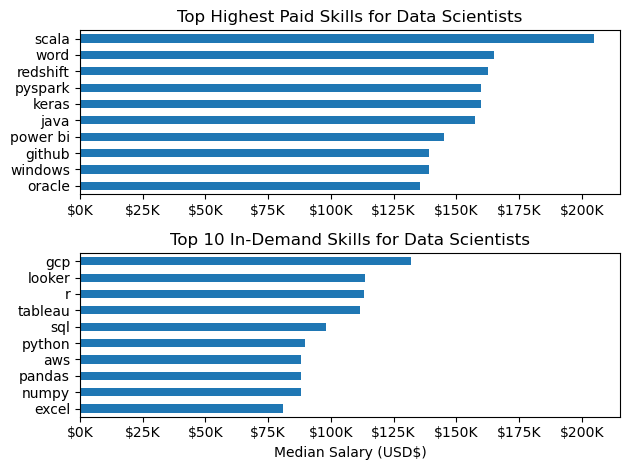

In [44]:
fig, ax = plt.subplots(2, 1)

df_DS_top_pay.plot(kind = 'barh', y= 'median', ax = ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top Highest Paid Skills for Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#alternatie for invert_yaxis
df_DS_top_skills[::-1].plot(kind='barh', y = 'median', ax = ax[1], legend=False)
ax[1].set_title('Top 10 In-Demand Skills for Data Scientists')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD$)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()